<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Food-Classification-Task" data-toc-modified-id="Food-Classification-Task-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Food Classification Task</a></span></li><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Library</a></span></li><li><span><a href="#Reading-Data" data-toc-modified-id="Reading-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading Data</a></span><ul class="toc-item"><li><span><a href="#Create-labels" data-toc-modified-id="Create-labels-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create labels</a></span></li><li><span><a href="#Train,-Validation-and-Test-Distribution" data-toc-modified-id="Train,-Validation-and-Test-Distribution-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train, Validation and Test Distribution</a></span></li><li><span><a href="#Sample-Images" data-toc-modified-id="Sample-Images-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Sample Images</a></span></li></ul></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Extraction</a></span></li><li><span><a href="#Fine-Tuning-VGG16-:-Transfer-Learning" data-toc-modified-id="Fine-Tuning-VGG16-:-Transfer-Learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fine Tuning VGG16 : Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#Fine-Tuning-Full-Network" data-toc-modified-id="Fine-Tuning-Full-Network-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fine Tuning Full Network</a></span><ul class="toc-item"><li><span><a href="#Loading-chopped-VGG16-Model" data-toc-modified-id="Loading-chopped-VGG16-Model-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Loading chopped VGG16 Model</a></span></li><li><span><a href="#Building-Model" data-toc-modified-id="Building-Model-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Building Model</a></span></li><li><span><a href="#Accuracy-and-Loss-Plot" data-toc-modified-id="Accuracy-and-Loss-Plot-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Accuracy and Loss Plot</a></span></li><li><span><a href="#Test-Evaluation" data-toc-modified-id="Test-Evaluation-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Test Evaluation</a></span></li></ul></li><li><span><a href="#Fine-Tuning-Half-Network" data-toc-modified-id="Fine-Tuning-Half-Network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fine Tuning Half Network</a></span><ul class="toc-item"><li><span><a href="#Load-Half-Tunable-VGG16-Model" data-toc-modified-id="Load-Half-Tunable-VGG16-Model-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Load Half Tunable VGG16 Model</a></span></li><li><span><a href="#Building-Model" data-toc-modified-id="Building-Model-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Building Model</a></span></li><li><span><a href="#Accuracy-and-Loss-Plot" data-toc-modified-id="Accuracy-and-Loss-Plot-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Accuracy and Loss Plot</a></span></li><li><span><a href="#Test-Evaluation" data-toc-modified-id="Test-Evaluation-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Test Evaluation</a></span></li></ul></li></ul></li></ul></div>

The idea of transfer learning comes from a curious phenomenon that many deep neural networks trained on natural images learn features similar to Gabor filters and color blobs in the first layer. Such first-layer features appear not to specific to a particular dataset or task but are general in that they are applicable to many datasets and tasks. 
As finding these standard features on the first layer seems to occur regardless of the exact cost function and natural image dataset, we call these first-layer features general and can be transferred for learning specific datasets. 

In transfer learning we first train a base network on a base dataset and task, and then we transfer the learned features, to a second target network to be trained on a target dataset and task. This process will tend to work if the features are general, that is, suitable to both base and target tasks, instead of being specific to the base task.

In practice, very few people train an entire Convolutional Network from scratch because it is relatively rare to have a dataset of sufficient size. Instead, it is common to pre-train a ConvNet on a very large dataset (e.g. ImageNet, which contains 1.2 million images with 1000 categories), and then use the pre-trained model either as an initialization or a fixed feature extractor for the task of interest.

The advantages of transfer learning are that:
1. There is no need of an extremely large training data-set.
2. Not much computational power is required.As we are using pre-trained weights and only have to learn the weights of the last few layers.

There are two ways to do transfer learning.
1. Feature Extraction from pre-trained model and then training a classifer on top of it.
2. Fine tuning the pre-trained model keeping learnt weights as initial parameters.

## Food Classification Task
<u>Problem Description</u>


In this blog-post, We will use a dataset containing 16643 food images grouped in 11 major food categories for transfer learning demonstration. The 11 categories are: 
* Bread
* Dairy product
* Dessert
* Egg
* Fried food
* Meat
* Noodles/Pasta
* Rice
* Seafood
* Soup
* Vegetable/Fruit 

The Food-11 dataset is divided in three parts: training, validation and evaluation. The naming convention is used, where ID 0-10 refers to the 11 food categories respectively. This is a food classification task where we have to predict the food category given an image.

Lets start with python codes on transfer learning with fine tuning the pre-trained model.

## Import Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 

# Importing sklearn libraries
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing Keras libraries 
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Reading Data

In [2]:
train = [os.path.join("Food-11/training",img) for img in os.listdir("Food-11/training")]
val = [os.path.join("Food-11/validation",img) for img in os.listdir("Food-11/validation")]
test = [os.path.join("Food-11/evaluation",img) for img in os.listdir("Food-11/evaluation")]

In [3]:
len(train),len(val),len(test)

(9866, 3430, 3347)

In [4]:
train[0:5]

['Food-11/training/9_1339.jpg',
 'Food-11/training/2_1351.jpg',
 'Food-11/training/1_170.jpg',
 'Food-11/training/6_31.jpg',
 'Food-11/training/8_558.jpg']

### Create labels

In [5]:
train_y = [int(img.split("/")[-1].split("_")[0]) for img in train]
val_y = [int(img.split("/")[-1].split("_")[0]) for img in val]
test_y = [int(img.split("/")[-1].split("_")[0]) for img in test]

In [6]:
num_classes = 11
y_train = np_utils.to_categorical(train_y, num_classes)
y_val = np_utils.to_categorical(val_y, num_classes)
y_test = np_utils.to_categorical(test_y, num_classes)

In [7]:
train_y[0:10]

[9, 2, 1, 6, 8, 6, 0, 9, 0, 9]

In [8]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

### Train, Validation and Test Distribution

Training data available in 11 classes
[994, 429, 1500, 986, 848, 1325, 440, 280, 855, 1500, 709]


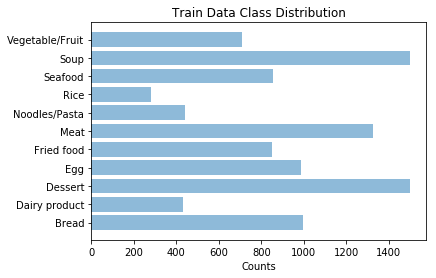

In [9]:
print("Training data available in 11 classes")
print([train_y.count(i) for i in range(0,11)])

food_classes = ('Bread','Dairy product','Dessert','Egg','Fried food','Meat',
           'Noodles/Pasta','Rice','Seafood', 'Soup', 'Vegetable/Fruit')

y_pos = np.arange(len(food_classes))
counts = [train_y.count(i) for i in range(0,11)]

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Train Data Class Distribution')

plt.show()

In [10]:
print("Validation data available in 11 classes")
[val_y.count(i) for i in range(0,11)]

Validation data available in 11 classes


[362, 144, 500, 327, 326, 449, 147, 96, 347, 500, 232]

In [11]:
print("Test data available in 11 classes")
[test_y.count(i) for i in range(0,11)]

Test data available in 11 classes


[368, 148, 500, 335, 287, 432, 147, 96, 303, 500, 231]

### Sample Images

In [12]:
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            image = load_img(train[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
    # show the plot
    plt.show()


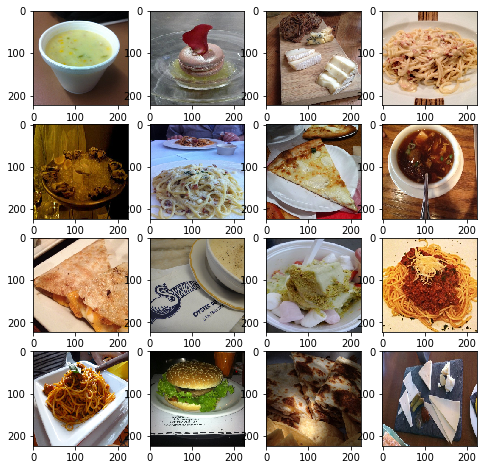

In [13]:
show_imgs(train)

## Feature Extraction
Custom function to extract features of each image in Food-11 dataset using VGG16 model

In [14]:
def create_features(dataset):
    
    x_scratch = []

    # loop over the images
    for imagePath in dataset:

        # load the input image and image is resized to 224x224 pixels
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)

        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
        
        # add the image to the batch
        x_scratch.append(image)
        
    x = np.vstack(x_scratch)
    return x

The feature being extracted for each dataset train, val and test is preprocessed raw input image (224,224,3). 

In [15]:
train_x = create_features(train)
val_x = create_features(val)
test_x = create_features(test)

In [16]:
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(9866, 224, 224, 3)
(3430, 224, 224, 3)
(3347, 224, 224, 3)


## Fine Tuning VGG16 : Transfer Learning

### Fine Tuning Full Network

In [17]:
# Creating a checkpointer 
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

#### Loading chopped VGG16 Model

In [18]:
# load the VGG16 network 
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

[INFO loading network...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)   

#### Building Model

In [19]:
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.2))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(11, activation='softmax'))
model_transfer_full.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1111      
Total params: 14,767,099
Trainable params: 14,767,099
Non-trainable params: 0
_________________________________________________________________


In [20]:
opt = Adam(lr=0.00001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train, batch_size=32, epochs=10,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Train on 9866 samples, validate on 3430 samples
Epoch 1/10
9866/9866 [==============================] - 89s 9ms/step - loss: 2.0969 - acc: 0.3394 - val_loss: 1.2539 - val_acc: 0.5837

Epoch 00001: val_loss improved from inf to 1.25395, saving model to scratchmodel.best.hdf5
Epoch 2/10
9866/9866 [==============================] - 87s 9ms/step - loss: 1.0994 - acc: 0.6451 - val_loss: 0.8644 - val_acc: 0.7236

Epoch 00002: val_loss improved from 1.25395 to 0.86440, saving model to scratchmodel.best.hdf5
Epoch 3/10
9866/9866 [==============================] - 87s 9ms/step - loss: 0.7368 - acc: 0.7619 - val_loss: 0.6650 - val_acc: 0.7927

Epoch 00003: val_loss improved from 0.86440 to 0.66498, saving model to scratchmodel.best.hdf5
Epoch 4/10
9866/9866 [==============================] - 87s 9ms/step - loss: 0.5393 - acc: 0.8281 - val_loss: 0.5890 - val_acc: 0.8207

Epoch 00004: val_loss improved from 0.66498 to 0.58902, saving model to scratchmodel.best.hdf5
Epoch 5/10
9866/9866 [==========

#### Accuracy and Loss Plot

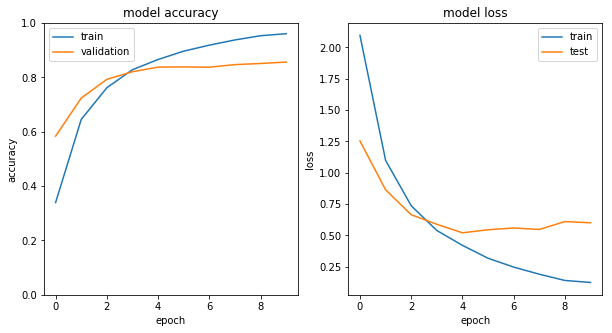

In [21]:
def plot_accuracy_loss(history):    
    fig = plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.ylim([0, 1])

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

plot_accuracy_loss(history)

#### Test Evaluation

In [22]:
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(test_y, preds))
print("\nNumber of correctly identified imgaes: ",
      accuracy_score(test_y, preds, normalize=False),"\n")
confusion_matrix(test_y, preds, labels=range(0,11))


Accuracy on Test Data:  0.8769046907678518

Number of correctly identified imgaes:  2935 



array([[313,   1,  27,  13,   3,   7,   0,   0,   1,   2,   1],
       [  5, 106,  29,   1,   0,   4,   0,   1,   0,   2,   0],
       [ 10,   9, 445,   6,   2,   7,   0,   2,  12,   7,   0],
       [ 21,   3,  25, 282,   0,   1,   0,   2,   1,   0,   0],
       [ 13,   1,  19,   2, 234,   9,   1,   0,   1,   5,   2],
       [ 12,   0,  31,   7,  11, 366,   0,   1,   2,   1,   1],
       [  0,   0,   0,   2,   1,   0, 143,   0,   0,   1,   0],
       [  0,   0,   2,   0,   0,   0,   0,  94,   0,   0,   0],
       [  5,   0,  23,   3,   1,   6,   0,   1, 262,   1,   1],
       [  3,   0,  14,   0,   1,   1,   0,   0,   4, 476,   1],
       [  3,   1,   7,   2,   0,   0,   2,   1,   1,   0, 214]])

### Fine Tuning Half Network

#### Load Half Tunable VGG16 Model

In [23]:
# load the VGG16 network 
print("[INFO] loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])

# Freeze the layers except the last 9 layers
for layer in model_vgg.layers[:-9]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in model_vgg.layers:
    print(layer, layer.trainable)

[INFO] loading network...
<keras.engine.input_layer.InputLayer object at 0x7f5acc72cd68> False
<keras.layers.convolutional.Conv2D object at 0x7f58d034bb38> False
<keras.layers.convolutional.Conv2D object at 0x7f58d03e70f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f5acc544c18> False
<keras.layers.convolutional.Conv2D object at 0x7f58d02f9550> False
<keras.layers.convolutional.Conv2D object at 0x7f58d03716a0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f58d02e8048> False
<keras.layers.convolutional.Conv2D object at 0x7f58d02e8eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f58d02a3048> False
<keras.layers.convolutional.Conv2D object at 0x7f58d0243320> False
<keras.layers.pooling.MaxPooling2D object at 0x7f58d025f278> True
<keras.layers.convolutional.Conv2D object at 0x7f58d025feb8> True
<keras.layers.convolutional.Conv2D object at 0x7f58d0223048> True
<keras.layers.convolutional.Conv2D object at 0x7f58d01c4320> True
<keras.layers.pooling.MaxPooling2D obj

#### Building Model

In [24]:
model_transfer_half = Sequential()
model_transfer_half.add(model_vgg)
model_transfer_half.add(GlobalAveragePooling2D())
model_transfer_half.add(Dropout(0.2))
model_transfer_half.add(Dense(100, activation='relu'))
model_transfer_half.add(Dense(11, activation='softmax'))
model_transfer_half.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_4 (Dense)              (None, 11)                1111      
Total params: 14,767,099
Trainable params: 13,031,611
Non-trainable params: 1,735,488
_________________________________________________________________


In [25]:
opt = Adam(lr=0.00001)
model_transfer_half.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_half.fit(train_x, y_train, batch_size=32, epochs=10,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Train on 9866 samples, validate on 3430 samples
Epoch 1/10
9866/9866 [==============================] - 50s 5ms/step - loss: 2.0475 - acc: 0.3971 - val_loss: 1.1239 - val_acc: 0.6379

Epoch 00001: val_loss did not improve from 0.52079
Epoch 2/10
9866/9866 [==============================] - 49s 5ms/step - loss: 0.9886 - acc: 0.6817 - val_loss: 0.7377 - val_acc: 0.7720

Epoch 00002: val_loss did not improve from 0.52079
Epoch 3/10
9866/9866 [==============================] - 50s 5ms/step - loss: 0.6558 - acc: 0.7922 - val_loss: 0.6369 - val_acc: 0.8073

Epoch 00003: val_loss did not improve from 0.52079
Epoch 4/10
9866/9866 [==============================] - 50s 5ms/step - loss: 0.4705 - acc: 0.8467 - val_loss: 0.5566 - val_acc: 0.8324

Epoch 00004: val_loss did not improve from 0.52079
Epoch 5/10
9866/9866 [==============================] - 50s 5ms/step - loss: 0.3382 - acc: 0.8913 - val_loss: 0.5548 - val_acc: 0.8327

Epoch 00005: val_loss did not improve from 0.52079
Epoch 6/10
9866/9

#### Accuracy and Loss Plot

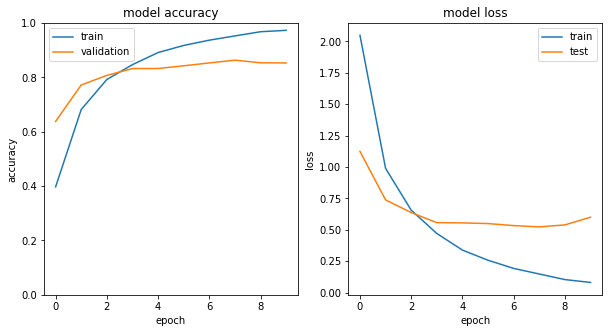

In [26]:
plot_accuracy_loss(history)

#### Test Evaluation

In [27]:
preds = np.argmax(model_transfer_half.predict(test_x), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(test_y, preds))
print("\nNumber of correctly identified imgaes: ",
      accuracy_score(test_y, preds, normalize=False),"\n")
confusion_matrix(test_y, preds, labels=range(0,11))


Accuracy on Test Data:  0.8843740663280549

Number of correctly identified imgaes:  2960 



array([[287,   2,  30,  24,  14,   3,   0,   1,   2,   4,   1],
       [  1, 117,  15,   2,   1,   3,   0,   3,   1,   3,   2],
       [  4,  14, 434,  10,   5,   6,   0,   3,  10,   7,   7],
       [ 16,   4,  18, 285,   2,   3,   1,   2,   1,   1,   2],
       [  3,   2,  13,   1, 254,   9,   0,   1,   2,   2,   0],
       [ 10,   0,  18,   3,  14, 378,   0,   1,   4,   1,   3],
       [  0,   0,   1,   1,   1,   0, 143,   0,   0,   1,   0],
       [  0,   0,   1,   0,   0,   0,   0,  95,   0,   0,   0],
       [  1,   0,  22,   4,   0,   5,   0,   1, 265,   1,   4],
       [  2,   3,   7,   2,   1,   0,   0,   0,   0, 485,   0],
       [  0,   0,   6,   1,   0,   1,   0,   3,   2,   1, 217]])